In [ ]:
from google.colab import drive
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
import csv
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data with pandas
import pandas as pd
train = pd.read_csv('./drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('./drive/MyDrive/Colab Notebooks/test.csv')
print(train.shape) #in ra kích thước của data
print(train) #show data
print(test.shape)
print(test)

(60000, 785)
       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          5       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          4       0       0       0  ...         0         0         0         0
3          1       0       0       0  ...         0         0         0         0
4          9       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
59995      8       0       0       0  ...         0         0         0         0
59996      3       0       0       0  ...         0         0         0         0
59997      5       0       0       0  ...         0         0         0         0
59998      6       0       0       0  ...         0         0         0         0
59999      8       0       0       0  ...         0         0         0         0

[6

In [ ]:
train.head() #show n hàng đầu tiên, default = 5

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train["label"] #lấy cột label của train data
print("y_train: ", y_train.shape)
print(y_train)
X_train = train.drop(labels = ["label"], axis = 1) #lấy tất cả cột trừ cột label
print("X_train: ", X_train.shape)
print(X_train)

y_train:  (60000,)
0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64
X_train:  (60000, 784)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
59995       0       0       0       0  ...         0         0         0         0
59996       0       0       0       0  ...         0         0         0         0
59997       0       0       0       0  ...       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 	 # y_train value counts # 
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64


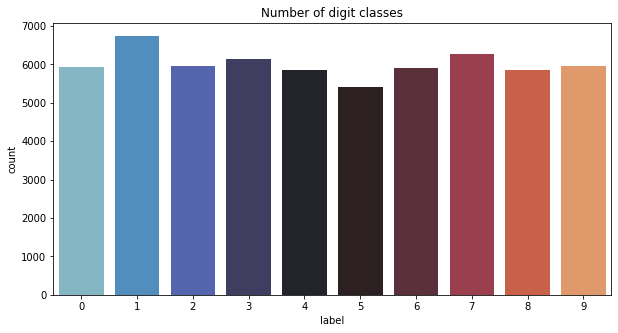

In [ ]:
import matplotlib.pyplot as plt
#thư viện trực quan hóa thống kê dữ liệu
import seaborn as sns
#khung biểu diễn data, 10 và 5 là kích thước (đơn vị: inches), default: 6.4, 4.8
plt.figure(figsize = (10, 5))
#đếm tần số của mỗi giá trị theo thứ tự giảm dần, biểu diễn bằng đồ thị
g = sns.countplot(y_train, palette = "icefire")
#tiêu đề khung
plt.title("Number of digit classes")
#value_counts đếm tần số của các giá trị, xếp theo thứ tự giảm dần
print(" \t # y_train value counts # \n", y_train.value_counts()) 

In [ ]:
#chuẩn hóa các giá trị
X_train = X_train / 255.0
print("X_train: ", X_train.shape)
print(X_train)
X_test = test / 255.0
print("X_test: ", X_test.shape)
print(X_test)

X_train:  (60000, 784)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
59995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
59996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
59997     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
59998     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
59999     0.0     0.0     0.0     0.0  ...       0.0       0.0  

In [ ]:
#chuyển dữ liệu thành ma trận 4 chiều, (x, y, a, b)
#a, b là kích thước của 1 lớp
#x = -1 là kích thước không xác định, Numpy sẽ tự tính
#y là số lớp
X_test = X_test.values.reshape(-1,28,28,1)
print("X_test: ", X_test.shape)
print(X_test)
X_train = X_train.values.reshape(-1,28,28,1)
print("X_train: ", X_train.shape)
print(X_train)

X_test:  (10000, 28, 28, 1)
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [

In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
print("Y_train pre one hot encoding", y_train.shape)
print(y_train)
#to_categorical chuyển một vector lớp (số nguyên) thành một ma trận lớp nhị phân
#num_classes là số lớp, default = giá trị max + 1
Y_train = to_categorical(y_train, num_classes = 10)
print("Y_train after one hot encoding", Y_train.shape)
print(Y_train)

Y_train pre one hot encoding (60000,)
0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64
Y_train after one hot encoding (60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split
#chia X_train, Y_train thành các mảng ngẫu nhiên, test_size là tỉ lệ của X_test và X_train
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (54000, 28, 28, 1)
x_val shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_val shape (6000, 10)


**Here**

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation = 'relu', input_shape = (28,28,1)))
#filter: số lớp Conv, padding: tạo vòng 0 quanh model, 28 28: kích thước, 1: 1 chiều sâu
model.add(MaxPool2D(pool_size = (2,2)))
#pool_size: kích thước ma trận pooling
model.add(Dropout(0.25))
#dropout: loại bỏ một phần dữ liệu
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

In [ ]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics = ["accuracy"])
epochs = 100  
batch_size = 250

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

datagen.fit(X_train)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=6)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
216/216 [==============================] - 55s 188ms/step - loss: 1.4216 - accuracy: 0.5140 - val_loss: 0.1542 - val_accuracy: 0.9600
Epoch 2/100
216/216 [==============================] - 40s 184ms/step - loss: 0.3783 - accuracy: 0.8796 - val_loss: 0.1001 - val_accuracy: 0.9713
Epoch 3/100
216/216 [==============================] - 40s 184ms/step - loss: 0.2781 - accuracy: 0.9128 - val_loss: 0.0853 - val_accuracy: 0.9740
Epoch 4/100
216/216 [==============================] - 40s 186ms/step - loss: 0.2319 - accuracy: 0.9275 - val_loss: 0.0699 - val_accuracy: 0.9790
Epoch 5/100
216/216 [==============================] - 40s 183ms/step - loss: 0.1983 - accuracy: 0.9394 - val_loss: 0.0593 - val_accuracy: 0.9833
Epoch 6/100
216/216 [==============================] - 40s 183ms/step - loss: 0.1849 - accuracy: 0.9428 - val_loss: 0.0540 - val_accuracy: 0.9840
Epoch 7/100
216/216 [==============================] - 40s 183ms/step - loss: 0.1688 - accuracy: 0.9466 - val_loss: 0.0493 -

In [ ]:
print("Accuracy of the model is --> " , model.evaluate(X_val, Y_val, batch_size=batch_size)[1]*100 , "%")
print("Loss of the model is --> " , model.evaluate(X_val, Y_val, batch_size=batch_size)[0])

24/24 [==============================] - 1s 41ms/step - loss: 0.0300 - accuracy: 0.9907
Accuracy of the model is -->  99.06666874885559 %
24/24 [==============================] - 1s 41ms/step - loss: 0.0300 - accuracy: 0.9907
Loss of the model is -->  0.030010472983121872


In [ ]:
labels = model.predict(X_test)
labels.shape

(10000, 10)

In [ ]:
labels = np.argmax(labels, axis=1)
labels.shape

(10000,)

In [ ]:
submission = pd.read_csv("./drive/MyDrive/Colab Notebooks/sample.csv")
submission

,ImageId,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
9995,9995,0
9996,9996,0
9997,9997,0
9998,9998,0


In [ ]:
index = test.index.values
data = {'ImageId' : index, "Label" : labels}
df = pd.DataFrame(data = data)
df.head()
submit = pd.DataFrame({'ImageId' : index, "Label" : labels.astype(int).ravel()})
submit.to_csv("submission.csv",index = False)
submit

,ImageId,Label
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
...,...,...
9995,9995,2
9996,9996,3
9997,9997,4
9998,9998,5
